# The Sparks Foundation
# GRIPMAY21
# Mukesh Sahu
# Project:- Exploratory Data Analysis - Retail


**.Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
.As a business manager, try to find out the weak areas where you can 
work to make more profit.**


In [4]:
# Load the required libraries for analysis of data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set working directory
os.chdir("Downloads")

In [6]:
# lets Check working directory
os.getcwd()

'C:\\Users\\Mukesh Sahu\\Downloads'

In [7]:
# Load the data
Retail_Data = pd.read_csv("retail.csv")

In [8]:
Retail_Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
Retail_Data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
Retail_Data.shape

(9994, 13)

In [11]:
Retail_Data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
Retail_Data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [13]:
# dipects the data types and null values 
Retail_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
# lets Check summary of the dataset 
Retail_Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
# Missing Value anlysis

# to check if there is any missing values
Missing_val = Retail_Data.isnull().sum()
Missing_val
# In our dataset we dont have any missing values.so that we dont need to do any imputation methods 


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [49]:

# Continous Variables 
cnames= [ 'Quantity', 'Discount']

<AxesSubplot:xlabel='Quantity'>

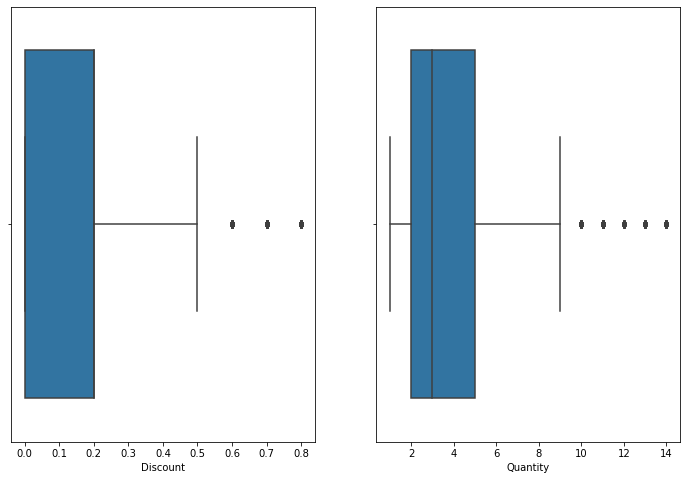

In [56]:
# Outlier Analysis

# Lets save copy of dataset before preprocessing
df = Retail_Data.copy()
Retail_Data = df.copy() 

# Using seaborn library, we can viualize the outliers by plotting box plot

fig, ax= plt.subplots(1, 2, figsize=(12,8))
sns.boxplot(x=df["Discount"], ax=ax[0])
sns.boxplot(x=df["Quantity"], ax=ax[1])
    

In [57]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-57-a4d133180dbf>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-57-a4d133180dbf>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [58]:
#new shape
df_new.shape

(7143, 13)

Quantity


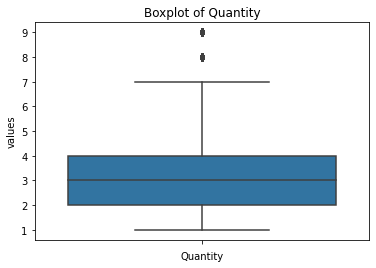

Discount


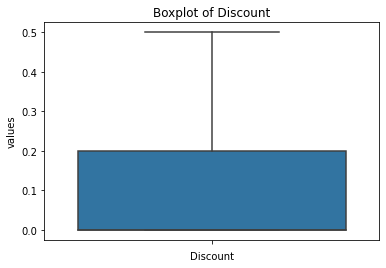

In [59]:
#After removing the Outliers
for i in cnames:
    print(i)
    sns.boxplot(y=df_new[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()
    

In [64]:
df=df_new.copy()

In [65]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656


In [66]:
# check for duplicates
df.duplicated().sum()

16

In [67]:
# Drop duplicated values 
df.drop_duplicates(inplace =True)

In [68]:
# NO diuplicates available. 
df.duplicated().sum()

0

In [69]:
# Drop the unnecessary columns. We can drop postal code since it does not have any inmpact sales and profit. 
df.drop(columns= "Postal Code", axis=1, inplace=True)

In [70]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656


In [71]:
corel = df.corr()
corel

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.128263,0.137336,0.396678
Quantity,0.128263,1.000000,-0.027241,0.229784
Discount,0.137336,-0.027241,1.000000,-0.310595
Profit,0.396678,0.229784,-0.310595,1.000000


<AxesSubplot:>

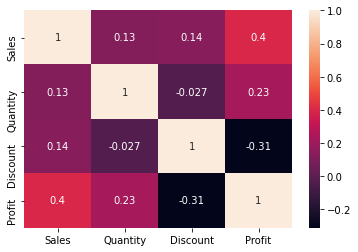

In [72]:
# Heatmap for colinearity between the Sales,profit, quantity and discount. 
sns.heatmap(corel, annot=True)

In [73]:
# State group wise view numerical data as a mean value
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].mean()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,3.727273,72.792955,0.000000,16.253025
Arizona,3.433333,87.471340,0.202000,7.818639
Arkansas,3.800000,62.082667,0.000000,20.169518
California,3.419738,81.487098,0.065178,14.478073
Colorado,3.538462,85.303590,0.200000,8.121499
Connecticut,2.967742,49.766081,0.009677,13.271656
Delaware,3.621622,60.936838,0.004054,18.648991
District of Columbia,3.625000,27.196250,0.000000,11.768050
Florida,3.247104,78.660236,0.202317,7.434843


In [74]:
# State group wise view numerical data as a min value
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].min()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,1,3.620,0.0,0.0000
Arizona,1,1.408,0.2,-36.4704
Arkansas,1,4.300,0.0,1.4190
California,1,0.990,0.0,-38.2116
Colorado,1,2.600,0.2,-33.8040
Connecticut,1,3.520,0.0,-15.5826
Delaware,1,3.380,0.0,-37.1124
District of Columbia,2,9.640,0.0,4.4344
Florida,1,1.344,0.2,-36.2940


In [75]:
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].max()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,9,477.240,0.0,59.1150
Arizona,8,471.920,0.5,62.9880
Arkansas,9,367.960,0.0,70.3120
California,9,494.376,0.2,70.2190
Colorado,9,483.136,0.2,69.7050
Connecticut,8,238.000,0.3,60.5528
Delaware,9,299.970,0.3,63.4368
District of Columbia,8,41.370,0.0,19.2384
Florida,9,432.456,0.5,55.0160


In [76]:
# State group wise view numerical data as a median value
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].median()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,3.0,26.070,0.0,9.17460
Arizona,3.0,48.892,0.2,4.71360
Arkansas,3.0,30.000,0.0,11.58000
California,3.0,39.920,0.0,9.87840
Colorado,3.0,35.808,0.2,4.65520
Connecticut,2.0,26.100,0.0,9.21660
Delaware,3.0,36.690,0.0,10.92720
District of Columbia,3.0,28.330,0.0,11.28000
Florida,3.0,36.112,0.2,4.68180


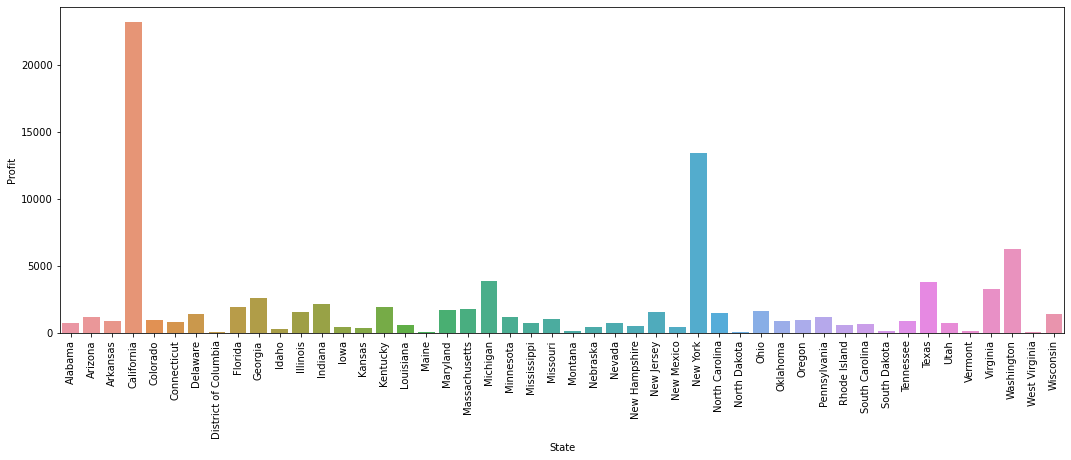

In [77]:
sales_profit = df.groupby('State')['Profit'].sum()
plt.figure(figsize=(18,6))
sns.barplot(x=sales_profit.index, y=sales_profit.values)
plt.xticks(rotation=90)
plt.ylabel('Profit')
plt.show()

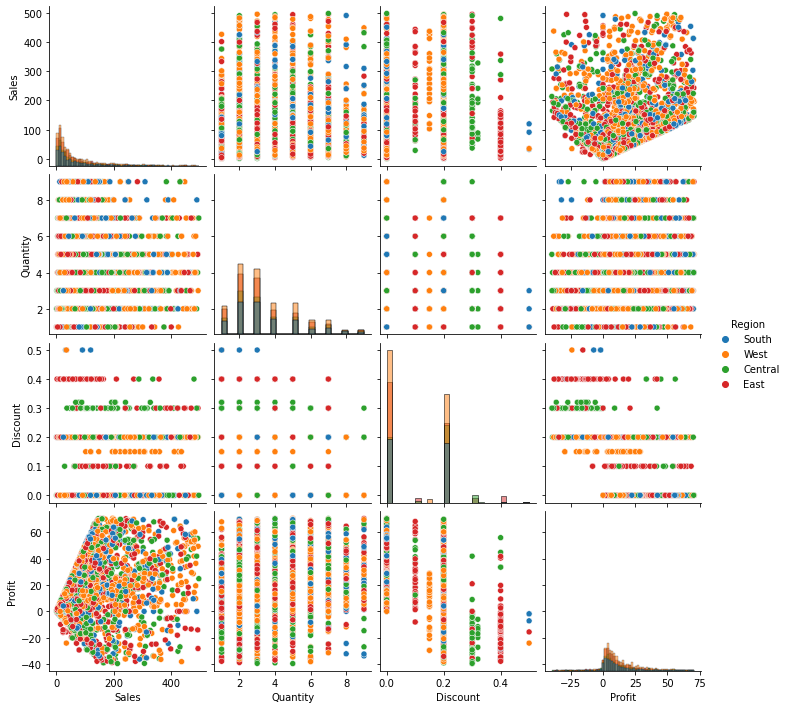

In [78]:
sns.pairplot(df, hue='Region', diag_kind="hist")


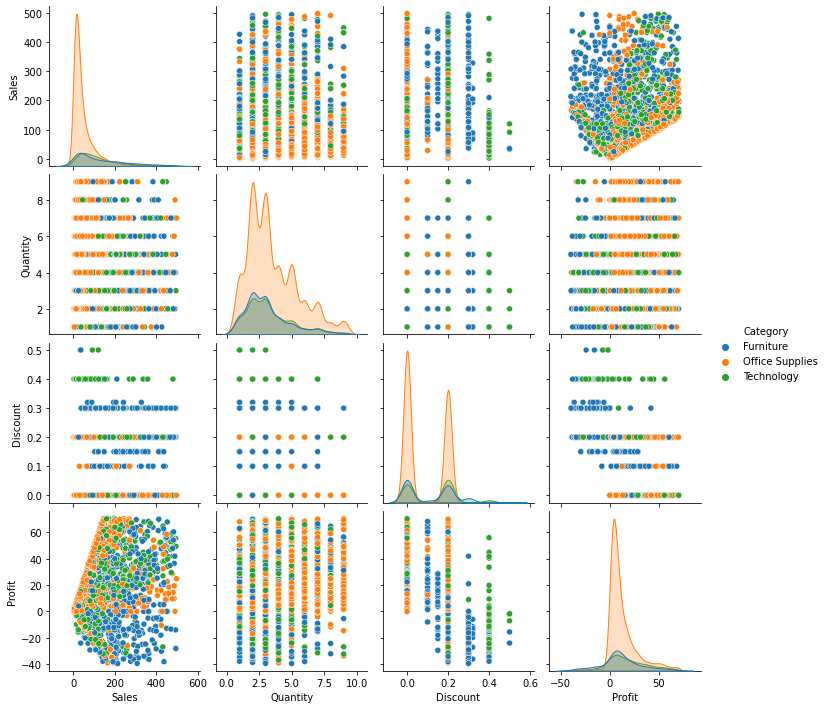

In [81]:
sns.pairplot(df,hue='Category')


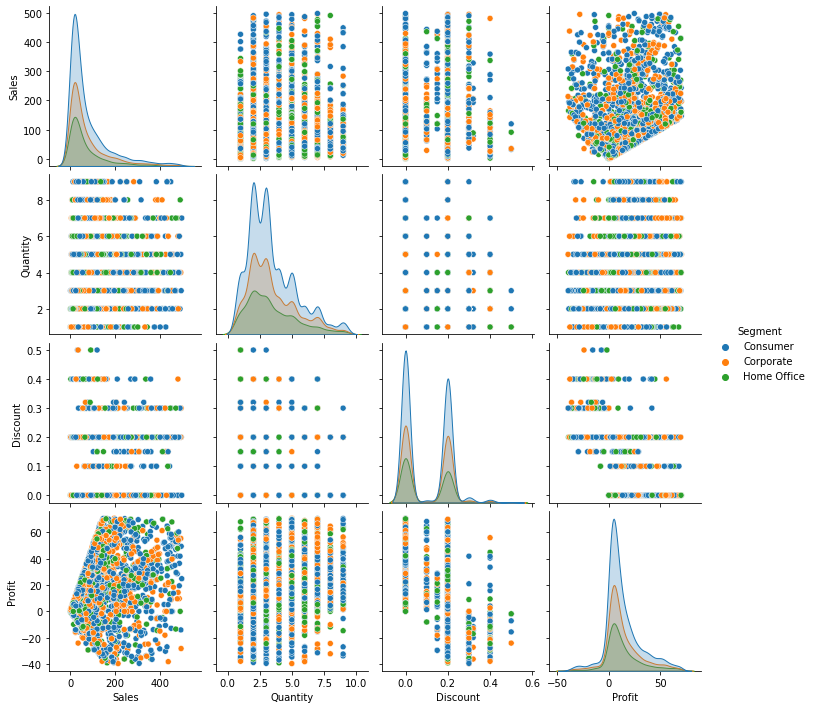

In [82]:
sns.pairplot(df,hue='Segment')


C:\Users\Mukesh Sahu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

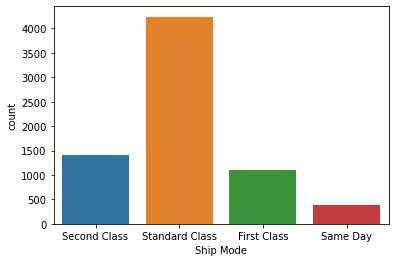

In [83]:
sns.countplot("Ship Mode",data=df)


C:\Users\Mukesh Sahu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

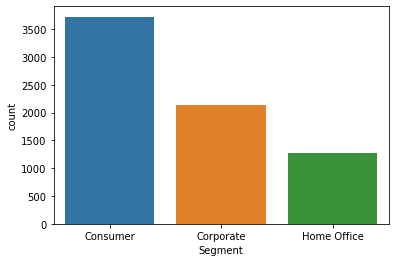

In [84]:
sns.countplot("Segment",data=df)


C:\Users\Mukesh Sahu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

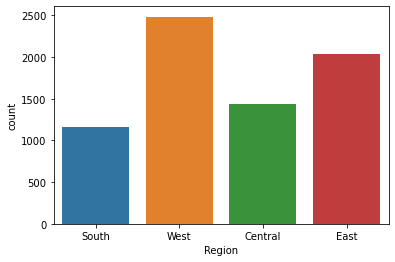

In [85]:
sns.countplot("Region",data=df)


C:\Users\Mukesh Sahu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

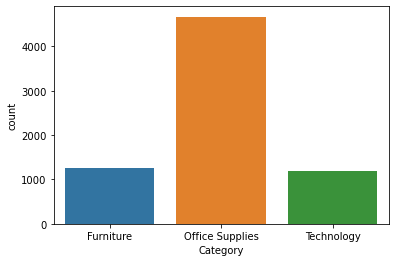

In [86]:
sns.countplot("Category",data=df)


<AxesSubplot:xlabel='State'>

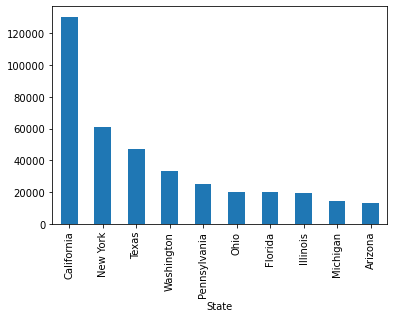

In [87]:
sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales[:10].plot(kind ='bar') # sales of top 10 states

<AxesSubplot:title={'center':'States with sales'}, xlabel='State'>

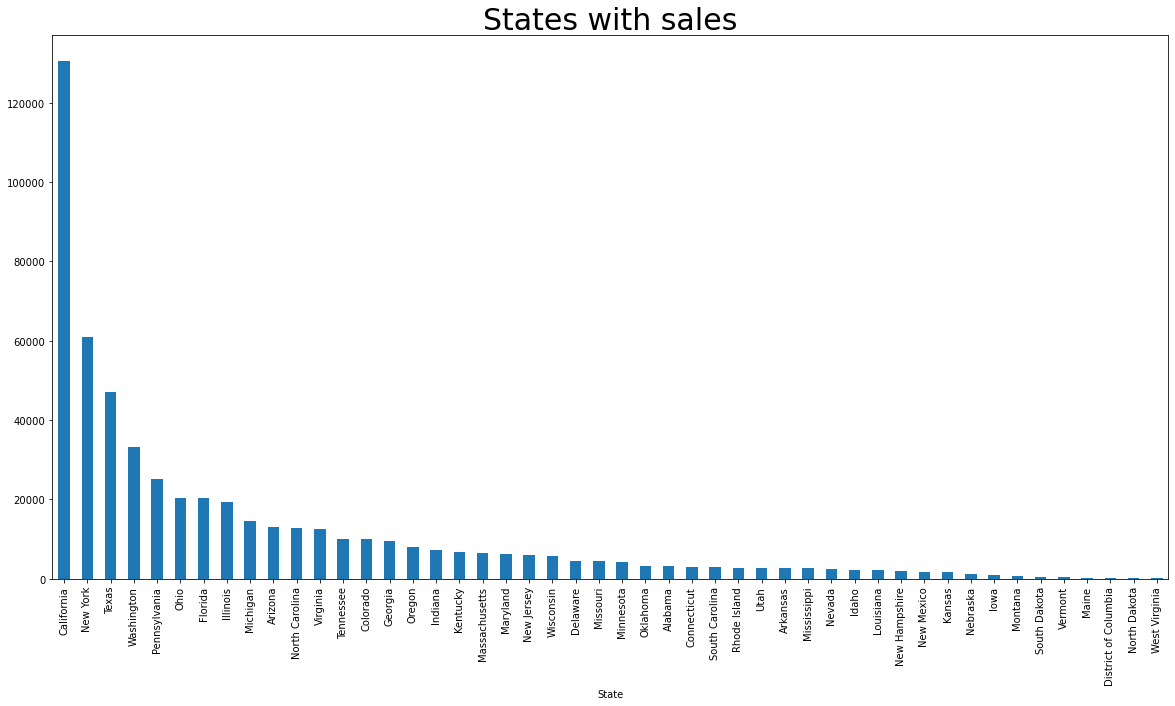

In [88]:
states = df.groupby('State')['Sales'].sum()
states.sort_values(ascending=False, inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title("States with sales", size=30)
states.plot.bar()

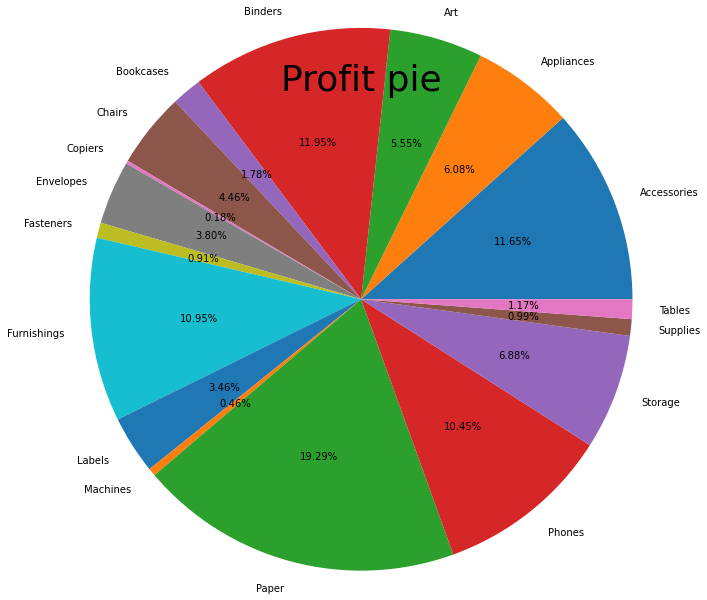

In [89]:
profit=df[df.Profit>0]
loss=df[df.Profit<0]

# percentage share of total profit by each sub-category
plt.pie(profit.groupby('Sub-Category').agg('sum').Profit,radius=3.12,labels=profit.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%')
plt.title('Profit pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()

<ipython-input-91-ee021d5c00f2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby(['Sub-Category'])['Profit','Sales'].sum()


<AxesSubplot:xlabel='Sub-Category'>

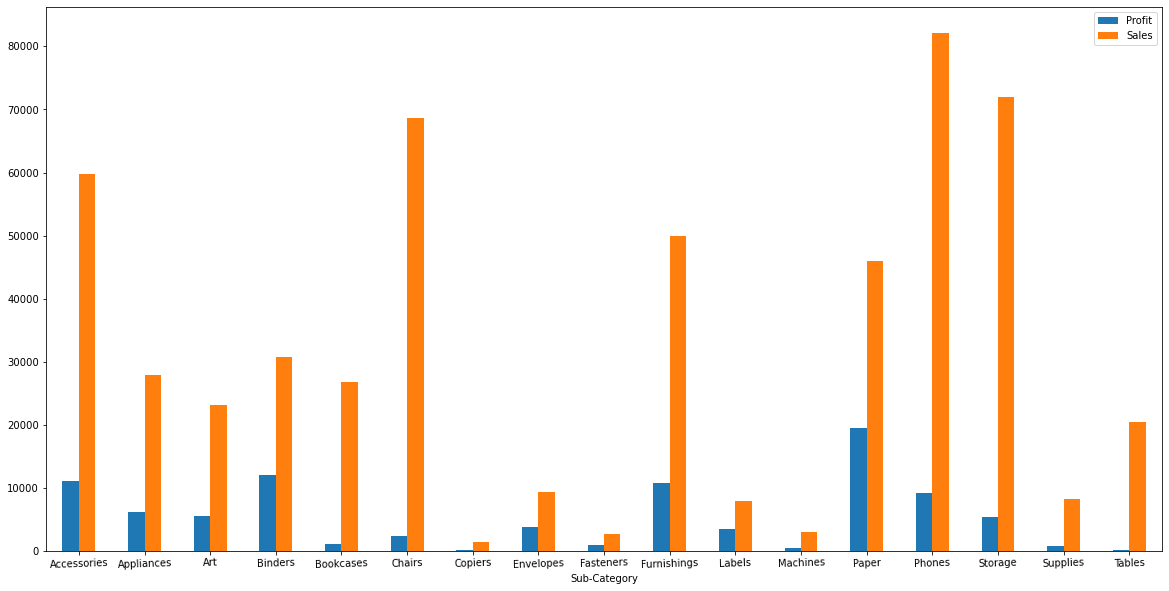

In [91]:
# Sales profit per category
category = df.groupby(['Sub-Category'])['Profit','Sales'].sum()
category.plot.bar(rot=2,figsize=(20,10))

[]

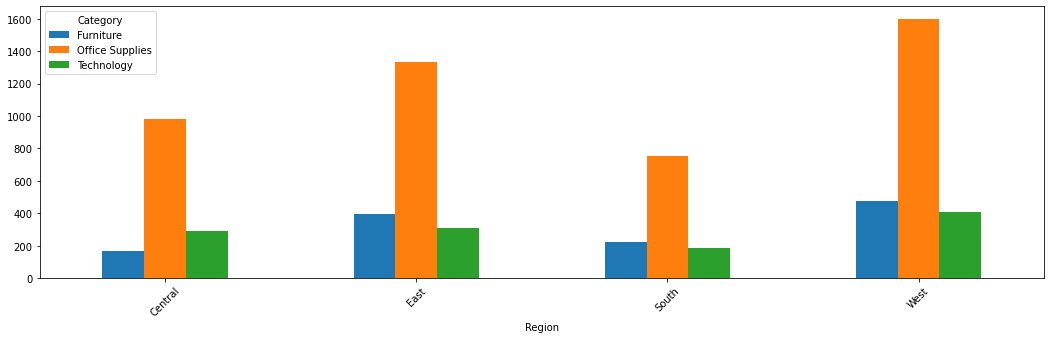

In [92]:
pd.crosstab( df['Region'],df['Category']).plot(kind='bar', figsize=(18,5))
plt.xticks(rotation=45)
plt.plot()

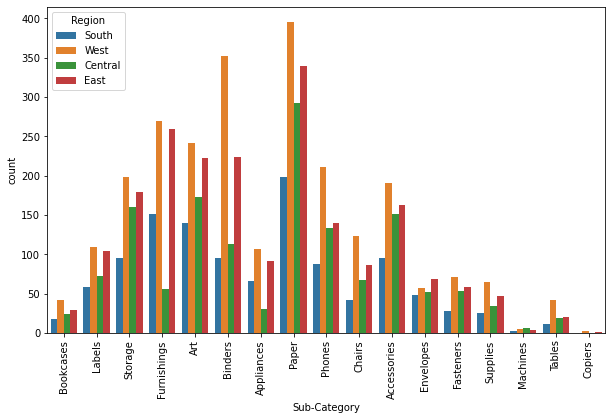

In [93]:
# To see the Region wise different sub-categories order
plt.figure(figsize=(10,6))
sns.countplot(x="Sub-Category", hue="Region",data=df)
plt.xticks(rotation="vertical")
plt.show()

**Conclusions :-**

**Here we observe that there is a moderate positive correlation between "Sales" and "Profit".
On the other hand, there is a negative correlation between both "Sales" and "Discount" and "Profit" and "Discount"
No correlation between quantity and profit.Cost should be reduced in some areas to increase the profit.
Give extra effort in segment area.
Increase the shipping mode.
Many states needs improvement in terms of category and sub-category,they should be sell at reasonable price.
The Standard class shipment mode is most preferred by the customers where as the Same Day shipment mode is least preferred.
We see the sales are very high for the states California, New York and Texas. However the sales are very low for states like Maine, West Virginia, North datoka
**